## Общая информация. Подготовка данных к работе

# Определение перспективного тарифа для телеком компании

### Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
calls = pd.read_csv('/datasets/calls.csv')

In [4]:
internet = pd.read_csv('/datasets/internet.csv')

In [5]:
messages = pd.read_csv('/datasets/messages.csv')

In [6]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [7]:
users = pd.read_csv('/datasets/users.csv')

### Начнем знакомство с таблицей "calls".

id — уникальный номер звонка


call_date — дата звонка


duration — длительность звонка в минутах


user_id — идентификатор пользователя, сделавшего звонок

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [10]:
calls.duplicated().sum()

0

In [11]:
calls.shape

(202607, 4)

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [13]:
calls['id']=calls['id'].astype('int64')

In [14]:
calls.dtypes

id                    int64
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [15]:
calls.head(10)

,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000
5,10005,2018-11-02,0.00,1000
6,10006,2018-10-18,0.00,1000
7,10007,2018-08-22,18.31,1000
8,10008,2018-09-15,18.44,1000
9,10009,2018-08-15,0.00,1000


In [16]:
calls['duration'] = calls['duration'].apply(np.ceil)

<font color='brown'>Молодец, что не забываешь здесь округлить, но теперь данные целочисленные, так что имеет смысл сразу поменять тип.

In [17]:
calls['duration'] = calls['duration'].astype('int64')

Готово.

В таблице 'calls' изменен тип данных в столбце 'call_date' на datetime64 и в столбце 'id' на int64. Замечены нули(0.00) в столбце 'duration'. Оставим нулевые значения как есть. Заполнять или удалять, в данном случае - это исказить данные. Нулевые значения могли появиться, когда абонент делал звонок, но ему не ответили, сбросили звонок или абонент был не в сети. Так что это важная часть данных. 'duration' округлили в большую сторону, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

<font color='green'>Согласен, в данных есть очень короткие разговоры, то есть нули это не округления, а что-то другое. Очень вероятно, что сброшенные/неотвеченные звонки, которые тарифицироваться не должны.

### Знакомство с таблицей "internet".

id — уникальный номер сессии


mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)


session_date — дата интернет-сессии


user_id — идентификатор пользователя

In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [20]:
internet.duplicated().sum()

0

In [21]:
internet.shape

(149396, 5)

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [23]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [24]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
5,5,1000_5,400.0,2018-10-02,1000
6,6,1000_6,541.0,2018-09-07,1000
7,7,1000_7,416.0,2018-07-11,1000
8,8,1000_8,506.0,2018-10-08,1000
9,9,1000_9,346.0,2018-09-03,1000


В таблице 'internet' изменен тип данных в столбце 'session_date' на datetime64 и в столбце 'id' на int64. 'mb_used' округлили в большую сторону, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

### Знакомство с таблицей "messages".

id — уникальный номер сообщения


message_date — дата сообщения


user_id — идентификатор пользователя, отправившего сообщение

In [25]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [26]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [27]:
messages.duplicated().sum()

0

In [28]:
messages.shape

(123036, 3)

In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [30]:
messages['id'] = messages['id'].astype('int64')

In [31]:
messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [32]:
messages.head(10)

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000
5,10005,2018-06-20,1000
6,10006,2018-11-19,1000
7,10007,2018-10-29,1000
8,10008,2018-06-25,1000
9,10009,2018-12-18,1000


В таблице 'messages' изменен тип данных в столбце '	message_date' на datetime64 и в столбце 'id' на int64. 

### Знакомство с таблицей "tariffs".

tariff_name — название тарифа


rub_monthly_fee — ежемесячная абонентская плата в рублях


minutes_included — количество минут разговора в месяц, включённых в абонентскую плату


messages_included — количество сообщений в месяц, включённых в абонентскую плату


mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)


rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)


rub_per_message — стоимость отправки сообщения сверх тарифного пакета


rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [33]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [34]:
tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [35]:
tariffs.duplicated().sum()

0

In [36]:
tariffs.shape

(2, 8)

In [37]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице tariffs предобработка не требуется 

### Знакомство с таблицей "users".

user_id — уникальный идентификатор пользователя


first_name — имя пользователя


last_name — фамилия пользователя


age — возраст пользователя (годы)


reg_date — дата подключения тарифа (день, месяц, год)


churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [39]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [40]:
users.duplicated().sum()

0

In [41]:
users.shape

(500, 8)

В столбце 'churn_date' есть пропущенные значения. Оставим их, как они есть, ведь это означает, что тариф еще используется и договор с оператором действителен. 

### Ознакомились с таблицами

Все таблицы открыты и изучены. Методомами isnull().sum()найденны и изучены пропуски, методомами duplicated().sum()дубликаты по таблицам. Нигде, кроме таблицы users не было обнаружено пропусков или дубликатов. Но и в той таблице пропуски не мешают анализу и их решено оставить как есть. 

<font color='green'>Данные загружены и изучены. Используются верные методы для получения общей информации о таблице. Успешно найдены имеющиеся проблемы. Заодно и даты приведены к правильному формату.

# Анализ пользователей 

### Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [42]:
calls['date_month'] = pd.DatetimeIndex(calls['call_date']).month

In [43]:
user_calls = calls.groupby(['user_id', 'date_month'])['duration'].agg(['count', 'sum'])

In [44]:
user_calls.head(20)

count  sum
user_id date_month            
1000    5              22  159
        6              43  172
        7              47  340
        8              52  408
        9              58  466
        10             57  350
        11             43  338
        12             46  333
1001    11             59  430
        12             63  414
1002    6              15  117
        7              26  214
        8              42  289
        9              36  206
        10             33  212
        11             32  243
        12             33  236
1003    8              55  380
        9             134  961
        10            108  855

### Количество отправленных сообщений по месяцам

In [45]:
messages['date_month'] = pd.DatetimeIndex(messages['message_date']).month

In [46]:
user_messages = messages.groupby(['user_id', 'date_month'])['id'].count()
user_messages.head(20)

user_id  date_month
1000     5             22
         6             60
         7             75
         8             81
         9             57
         10            73
         11            58
         12            70
1002     6              4
         7             11
         8             13
         9              4
         10            10
         11            16
         12            12
1003     8             37
         9             91
         10            83
         11            94
         12            75
Name: id, dtype: int64

### Объем израсходованного интернет-трафика по месяцам для каждого абомнента 

In [47]:
internet['date_month'] = pd.DatetimeIndex(internet['session_date']).month

In [48]:
user_internet = internet.groupby(['user_id', 'date_month', ]).sum()['mb_used']

In [49]:
user_internet.head(20)

user_id  date_month
1000     5              2256.0
         6             23257.0
         7             14016.0
         8             14070.0
         9             14581.0
         10            14717.0
         11            14768.0
         12             9827.0
1001     11            18452.0
         12            14053.0
1002     6             10871.0
         7             17601.0
         8             20347.0
         9             16712.0
         10            13905.0
         11            18610.0
         12            18137.0
1003     8              8571.0
         9             12479.0
         10            14779.0
Name: mb_used, dtype: float64

Объединим все в одну таблицу для наглядности методом concat()

In [50]:
megaline_500 = pd.concat([user_calls, user_messages, user_internet], axis=1)
megaline_500 = megaline_500.reset_index()


In [51]:
megaline_500.head(10)

,user_id,date_month,count,sum,id,mb_used
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0
5,1000,10,57.0,350.0,73.0,14717.0
6,1000,11,43.0,338.0,58.0,14768.0
7,1000,12,46.0,333.0,70.0,9827.0
8,1001,11,59.0,430.0,NaN,18452.0
9,1001,12,63.0,414.0,NaN,14053.0


Так же нам нужны данные по пользователям из таблицы users. В новой таблице megaline_all мы соберем вместе все необхожиммые нам данные с помощью метода merge()

In [52]:
megaline_all = pd.merge(megaline_500, users.loc[:, ['tariff', 'city', 'age', 'reg_date', 'user_id']], on='user_id')

<font color=green>Молодец, что берешь из таблицы users только необходимые столбцы, нет смысла таскать за собой ненужные данные типа имени.

In [53]:
megaline_all.head(10)

,user_id,date_month,count,sum,id,mb_used,tariff,city,age,reg_date
0,1000,5,22.0,159.0,22.0,2256.0,ultra,Краснодар,52,2018-05-25
1,1000,6,43.0,172.0,60.0,23257.0,ultra,Краснодар,52,2018-05-25
2,1000,7,47.0,340.0,75.0,14016.0,ultra,Краснодар,52,2018-05-25
3,1000,8,52.0,408.0,81.0,14070.0,ultra,Краснодар,52,2018-05-25
4,1000,9,58.0,466.0,57.0,14581.0,ultra,Краснодар,52,2018-05-25
5,1000,10,57.0,350.0,73.0,14717.0,ultra,Краснодар,52,2018-05-25
6,1000,11,43.0,338.0,58.0,14768.0,ultra,Краснодар,52,2018-05-25
7,1000,12,46.0,333.0,70.0,9827.0,ultra,Краснодар,52,2018-05-25
8,1001,11,59.0,430.0,NaN,18452.0,smart,Москва,41,2018-11-01
9,1001,12,63.0,414.0,NaN,14053.0,smart,Москва,41,2018-11-01


Общая таблица megaline_all:


user_id - уникальный идентификатор пользователя


date_month - месяц в году


count	- кол-во звонков в месяце


sum - сумма минут в месяце


id - кол-во смс в месяце


mb_used	 - кол-во мб в месце


tariff - тариф, используемый абонентом


city - город абонента


age - возраст абонента


reg_date - дата заключение договора



<font color='green'>Данные объеденены верно. Получилась удобная компактная таблица, содержащая все необходимые данные. 

In [54]:
def user_internet_1(raw):
    if raw['tariff'] == 'smart':
        if raw['mb_used']/1024 - 15 > 0:
            return (raw['mb_used']/1024 - 15)*200
        return 0
    else:
        if raw['id']/1024 - 30 > 0:
            return (raw['mb_used']/1024 - 30)*150
        return 0

In [55]:
def user_calls_1(raw):
    if raw['tariff'] == 'smart':
        if raw['sum'] - 500 > 0:
            return (raw['sum'] - 500)*3
        return 0
    else:
        if raw['sum'] - 3000 > 0:
            return (raw['sum'] - 3000) + (raw['sum'] - 3000)
        return 0

In [56]:
def user_messages_1(raw):
    if raw['tariff'] == 'smart':
        if raw['id'] - 50 > 0:
            return (raw['id'] - 50)*3
        return 0
    else:
        if raw['id'] - 1000 > 0:
            return (raw['id'] - 1000) + (raw['sum'] - 1000)
        return 0

In [57]:
def tarif_pay_f(raw):
    if raw['tariff'] == 'smart':
        return 550
    return 1950

In [58]:
megaline_all['mb_up_rub'] = megaline_all.apply(user_internet_1, axis =1)
megaline_all['min_up_rub'] = megaline_all.apply(user_calls_1, axis =1)
megaline_all['mes_up_rub'] = megaline_all.apply(user_messages_1, axis =1)
megaline_all['tarif_pay'] = megaline_all.apply(tarif_pay_f, axis =1)
megaline_all['all_month_money'] = (megaline_all['mb_up_rub'] + 
                                   megaline_all['min_up_rub'] +
                                   megaline_all['mes_up_rub'] +
                                   megaline_all['tarif_pay']
                                  )

In [59]:
megaline_all.head(5)

,user_id,date_month,count,sum,id,mb_used,tariff,city,age,reg_date,mb_up_rub,min_up_rub,mes_up_rub,tarif_pay,all_month_money
0,1000,5,22.0,159.0,22.0,2256.0,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.0,1950,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.0,1950,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.0,1950,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.0,1950,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,ultra,Краснодар,52,2018-05-25,0.0,0.0,0.0,1950,1950.0


К таблице megaline_all добавились столбцы: 

mb_up_rub - сколько сверх тарифа заплатил абонент за интернет 

min_up_rub - сколько сверх тарифа заплатил абонент за минуты разговора 

mes_up_rub - сколько сверх тарифа заплатил абонент за сообщения 

tarif_pay - сколько абонент платит по тарифу 

all_month_money - сколько всего за месяц заплатил абонент 


В таблицы есть значения Nan. Их не следует удалять. Лучше заменить на 0. Так будет понятно, что в данный месяц абонент не пользовался какой-то из услуг тарифного пакета.

<font color='green'>Молодец, что учитываешь этот момент. Очень важно не удалять строки с этими пропусками, а заполнить нулями, мы же не хотим потерять пользователей, которые, например, не используют СМС.

In [60]:
megaline_all.isnull().sum()

user_id              0
date_month           0
count               40
sum                 40
id                 497
mb_used             11
tariff               0
city                 0
age                  0
reg_date             0
mb_up_rub            0
min_up_rub           0
mes_up_rub           0
tarif_pay            0
all_month_money      0
dtype: int64

In [61]:
megaline_all = megaline_all.fillna(0)

In [62]:
megaline_all.isnull().sum()

user_id            0
date_month         0
count              0
sum                0
id                 0
mb_used            0
tariff             0
city               0
age                0
reg_date           0
mb_up_rub          0
min_up_rub         0
mes_up_rub         0
tarif_pay          0
all_month_money    0
dtype: int64

Теперь в таблице нет пропущенных значений, а если абонент не пользовался какой-то из услуг, то нам это будет видно на гистограммах. 

# Сколько минут разговора требуется пользователям каждого тарифа в месяц?

Подсчитаем среднее, медиану, дисперсию и стандартное отклонение методами 'mean','median','var','std'

In [63]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Частота')

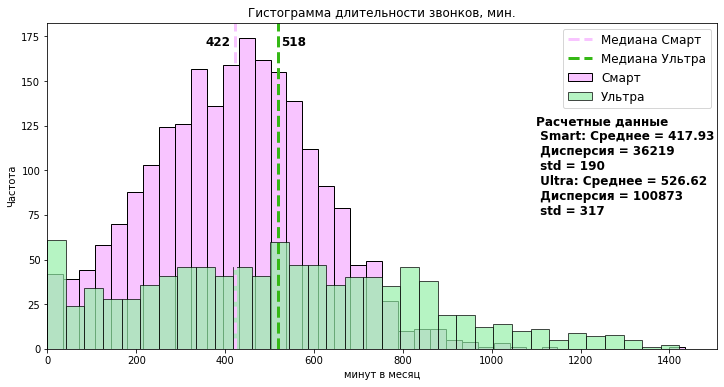

In [64]:

ax = plt.gca()

column = 'sum'

title = 'Гистограмма длительности звонков, мин.'
megaline_all[megaline_all['tariff'] == 'smart'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#f8c4ff', 
                                                                    title=title, xlim=0)
megaline_all[megaline_all['tariff'] == 'ultra'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, xlim=0, alpha=0.7)

plt.axvline(x=megaline_all[megaline_all['tariff'] == 'smart'][column].median(),
            linewidth=3, color='#f8c4ff', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'smart'][column].median()-65, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'smart'][column].median()), 
        fontweight='bold', fontsize='large')
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'ultra'][column].median(),
            linewidth=3, color='#35B815', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()+7, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()), 
        fontweight='bold', fontsize='large')

plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})

ax.text(1100, 75, 'Расчетные данные\n Smart: Среднее = 417.93\n Дисперсия = 36219\n std = 190\n Ultra: Среднее = 526.62\n Дисперсия = 100873\n std = 317', fontweight='bold', fontsize='large')

ax.set_xlabel('минут в месяц')
ax.set_ylabel('Частота')

<font color='green'>Очень нагляные визуализации! Для полного счастья можно добавить отметку на месячном лимите.

In [65]:
megaline_smart = (
    megaline_all
    .query('tariff in ("smart")')
)
megaline_ultra = (
    megaline_all
    .query('tariff in ("ultra")')
)


In [66]:
megaline_smart_minutes = megaline_smart['sum'].agg(['mean','median','var','std'])
megaline_smart_minutes

mean        417.934948
median      422.000000
var       36219.315784
std         190.313730
Name: sum, dtype: float64

In [67]:
megaline_ultra_minutes = megaline_ultra['sum'].agg(['mean','median','var','std'])
megaline_ultra_minutes

mean         526.623350
median       518.000000
var       100873.633397
std          317.606098
Name: sum, dtype: float64

Как видно на гистограмме, в среднем пользователем тарифа smart требуется в месяц 417-422 минуты, при 500 доступных бесплатно. Для тарифа ultra в среднем около 518-526 минут, при 3000 доступных. Есть так же те, кто звонками в некоторые месяцы не пользовался или же совершал звонки, но они так и не были начаты. И таких среди пользователей тарифа ultra больше, чем среди smart. Возможно, это свзяано с тем, что все больше людей совершают звонки через мессенджеры, чем расходуют больше интернет трафика, чем минуты звонков. если некоторая величина отклоняется от среднего под воздействием слабых, независимых друг от друга
факторов, она имеет нормальное распределение. Так что в целом мы видим нормальное распределение по звонкам, если отбросить нулевые значения. 

# Сколько сообщений требуется пользователям каждого тарифа в месяц?

Подсчитаем среднее, медиану, дисперсию и стандартное отклонение методами 'mean','median','var','std'

Text(0, 0.5, 'Частота')

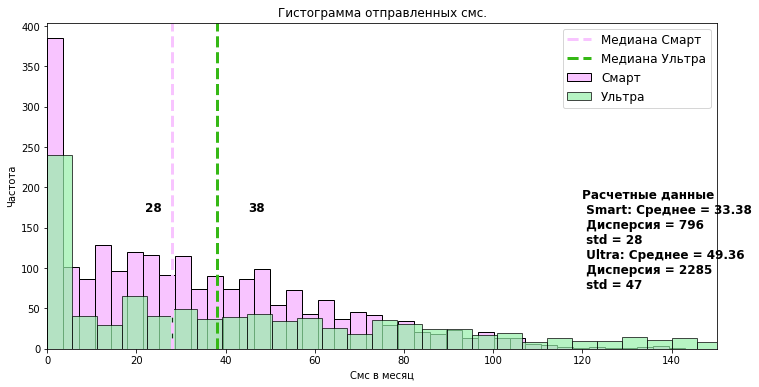

In [68]:
ax = plt.gca()
column = 'id'
title = 'Гистограмма отправленных смс.'
megaline_all[megaline_all['tariff'] == 'smart'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#f8c4ff', 
                                                                    title=title, xlim=0)

megaline_all[megaline_all['tariff'] == 'ultra'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, xlim=0, alpha=0.7)

plt.axvline(x=megaline_all[megaline_all['tariff'] == 'smart'][column].median(),
            linewidth=3, color='#f8c4ff', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'smart'][column].median()-6, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'smart'][column].median()), 
        fontweight='bold', fontsize='large')
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'ultra'][column].median(),
            linewidth=3, color='#35B815', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()+7, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()), 
        fontweight='bold', fontsize='large')

plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})

ax.text(120, 75, 'Расчетные данные\n Smart: Среднее = 33.38\n Дисперсия = 796\n std = 28\n Ultra: Среднее = 49.36\n Дисперсия = 2285\n std = 47', fontweight='bold', fontsize='large')

ax.set_xlabel('Смс в месяц')
ax.set_ylabel('Частота')

In [69]:
megaline_smart_sms = megaline_smart['id'].agg(['mean','median','var','std'])
megaline_smart_sms

mean       33.384029
median     28.000000
var       796.812958
std        28.227876
Name: id, dtype: float64

In [70]:
megaline_ultra_sms = megaline_ultra['id'].agg(['mean','median','var','std'])
megaline_ultra_sms

mean        49.363452
median      38.000000
var       2285.266143
std         47.804457
Name: id, dtype: float64

С сообщениями очень интересная ситуация, гистограмма явно идет на спад. При том что самые высокие значения у обоих тарифов около 0. Это можно связать с тем, что сейчас больше людей переписываются в мессенджерах, не используюя выделенное колличество смс из тарифного пакета услуг. Тем ни мение, в среднем, пользователи тарифа ultra используют сообщений больше, чем пользователи тарифа smart (38 и 28) 

# Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Подсчитаем среднее, медиану, дисперсию и стандартное отклонение методами 'mean','median','var','std'

Text(0, 0.5, 'Частота')

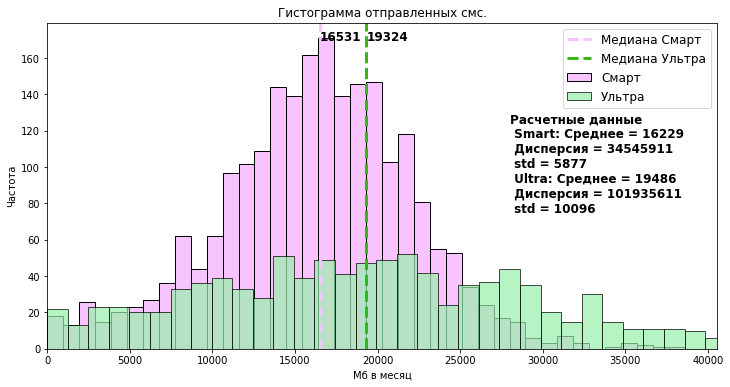

In [71]:
ax = plt.gca()
column = 'mb_used'
title = 'Гистограмма отправленных смс.'
megaline_all[megaline_all['tariff'] == 'smart'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#f8c4ff', 
                                                                    title=title, xlim=0)

megaline_all[megaline_all['tariff'] == 'ultra'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, xlim=0, alpha=0.7)
 
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'smart'][column].median(),
            linewidth=3, color='#f8c4ff', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'smart'][column].median()-6, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'smart'][column].median()), 
        fontweight='bold', fontsize='large')
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'ultra'][column].median(),
            linewidth=3, color='#35B815', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()+7, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()), 
        fontweight='bold', fontsize='large')

plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})

ax.text(28000, 75, 'Расчетные данные\n Smart: Среднее = 16229\n Дисперсия = 34545911\n std = 5877\n Ultra: Среднее = 19486\n Дисперсия = 101935611\n std = 10096', fontweight='bold', fontsize='large')

ax.set_xlabel('Мб в месяц')
ax.set_ylabel('Частота')

<font color='green'>Итак, очень наглядные графики с разными тарифами в одних осях. Визуализации аккуратны и снабжены подписями. 

In [72]:
megaline_smart_mb = megaline_smart['mb_used'].agg(['mean','median','var','std'])
megaline_smart_mb = megaline_smart_mb / 1024 #переведем в Гб
megaline_smart_mb

mean         15.848817
median       16.143555
var       33736.241335
std           5.739821
Name: mb_used, dtype: float64

In [73]:
megaline_ultra_mb = megaline_ultra['mb_used'].agg(['mean','median','var','std'])
megaline_ultra_mb = megaline_ultra_mb / 1024 #переведем в Гб
megaline_ultra_mb

mean         19.030177
median       18.871094
var       99546.504930
std           9.859685
Name: mb_used, dtype: float64

Среднее колиичество используемых Гб в тарифе smart = 15.84, что больше положенных по тарифу 15 Гб в месяц, при этом медиата тоже выше этого значение = 16.14. Но пользователи тарифа ultra не превышают 30 Гб, которые включены им в пакет. Пользователи тарифа smart имеют более нормальное распеределние, чем пользователи талифа ultra.

<font color=green>Итак, статистические параметры посчитаны, гистораммы построены, по ним сделаны верные выводы. Довольно подробно описано поведение пользователей: сколько им нужно трафика/минут/сообщений в месяц, хватает ли им, часто ли они переплачивают и за что конктерно. Даже нечего добавить.

# Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается или нет?

In [74]:
from scipy import stats as st

In [75]:
all_month_money_smart = (
    megaline_all
    .query('tariff in ("smart")')
)
all_month_money_smart['all_month_money'].agg(['mean','median','var','std'])
 

mean        1233.349467
median       959.898438
var       620452.607534
std          787.688141
Name: all_month_money, dtype: float64

In [76]:
all_month_money_ultra = (
    megaline_all
    .query('tariff in ("ultra")')
)
all_month_money_ultra['all_month_money'].agg(['mean','median','var','std'])


mean      1950.0
median    1950.0
var          0.0
std          0.0
Name: all_month_money, dtype: float64

Text(0, 0.5, 'Частота')

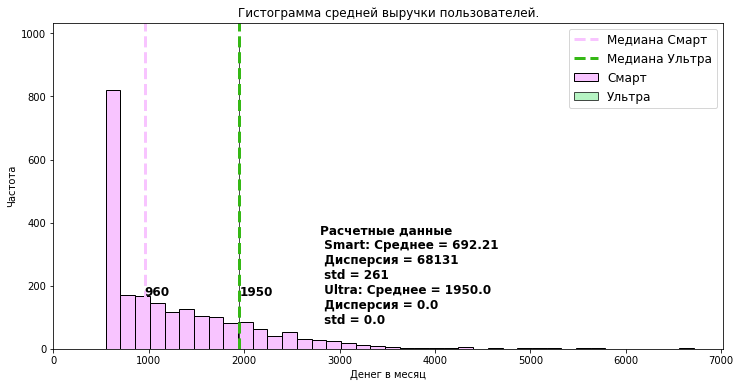

In [77]:
ax = plt.gca()
column = 'all_month_money'
title = 'Гистограмма средней выручки пользователей.'
megaline_all[megaline_all['tariff'] == 'smart'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#f8c4ff', 
                                                                    title=title, xlim=0)

megaline_all[megaline_all['tariff'] == 'ultra'][column].plot(kind='hist', bins=40, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, xlim=0, alpha=0.7)
 
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'smart'][column].median(),
            linewidth=3, color='#f8c4ff', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'smart'][column].median()-6, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'smart'][column].median()), 
        fontweight='bold', fontsize='large')
plt.axvline(x=megaline_all[megaline_all['tariff'] == 'ultra'][column].median(),
            linewidth=3, color='#35B815', linestyle='--')
ax.text(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()+7, 170, 
        '{0:.0f}'.format(megaline_all[megaline_all['tariff'] == 'ultra'][column].median()), 
        fontweight='bold', fontsize='large')

plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})

ax.text(2800, 80, 'Расчетные данные\n Smart: Среднее = 692.21\n Дисперсия = 68131\n std = 261\n Ultra: Среднее = 1950.0\n Дисперсия = 0.0\n std = 0.0', fontweight='bold', fontsize='large')

ax.set_xlabel('Денег в месяц')
ax.set_ylabel('Частота')

Дисперсии по двум группам в столбце all_month_money не равны. Это важно при проверке гипотез. Параментру equal_var нужно придать значение False.

### И так, проверим, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»

Выдвинем гипотезы:

    H₀ - средние выручки на обоих тарифах равны
    H₁ - средние выручки по двум тарифам различаются

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

Мы уже знакомы со средней ежемесячной выручкой с клиента каждого из тарифов. Еще раз их выведем:

In [95]:
alpha = .05

results = st.ttest_ind(
    megaline_all[megaline_all['tariff'] == 'ultra']['all_month_money'], 
    megaline_all[megaline_all['tariff'] == 'smart']['all_month_money'],
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.330079718955611e-294
Отвергаем нулевую гипотезу


Таким образом, среднаяя выручка по двум тарифам различается. 

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов или нет?

Сделаем две выборки: абонентов из города Москвы, и абонентов из других городов. Посмотрим, есть ли в этих выборках выбросы, если есть - избавимся от них.

In [79]:
megaline_Msk = (
    megaline_all
    .query('city in ("Москва")')
)
megaline_Msk['all_month_money'].agg(['mean','median','var','std'])

mean        1465.433536
median      1704.632812
var       463487.076218
std          680.798852
Name: all_month_money, dtype: float64

In [80]:
megaline_Msk['all_month_money'].describe()

count     611.000000
mean     1465.433536
std       680.798852
min       550.000000
25%       733.394531
50%      1704.632812
75%      1950.000000
max      5186.429688
Name: all_month_money, dtype: float64

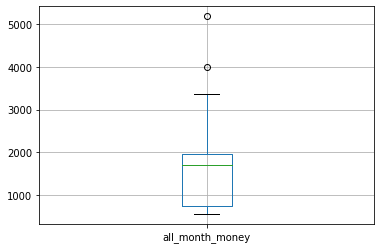

In [81]:
megaline_Msk.boxplot(column='all_month_money') 
plt.show()

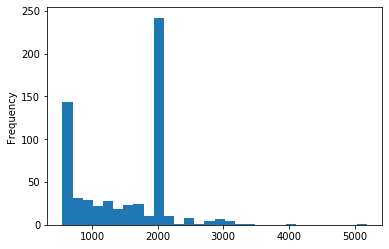

In [82]:
megaline_Msk['all_month_money'].plot(kind='hist', bins=30)
plt.show()

In [83]:
megaline_Msk['all_month_money'].quantile(0.75) #посомтрим при 75% всей выборки

1950.0

In [84]:
megaline_Msk['all_month_money'].quantile(0.99) #при 90% всей выборки

3139.6062499999994

На гистограмме видно, что есть редкие выбросы просле 1950. Так что дальнейших анализ продолжим без них 

Составим выборку без выбросов, где крайние знаяние 550 и 1950

In [85]:
megaline_Msk_1 = (
    megaline_all
    .query('city in ("Москва")')
    .query('550 <= all_month_money <= 1950')
)
megaline_Msk_1['all_month_money'].agg(['mean','median','var','std'])

mean        1358.908639
median      1528.296875
var       348921.699075
std          590.695945
Name: all_month_money, dtype: float64

Среднее, дисперсия и стандартное отклоения у нас изменились. 

Рассмотрим выборку, куда не  вошла Москва 

In [86]:
megaline_others = (
    megaline_all
    .query('city != "Москва"')
)
megaline_others['all_month_money'].agg(['mean','median','var','std'])

mean        1450.059958
median      1518.078125
var       557405.584685
std          746.595998
Name: all_month_money, dtype: float64

In [87]:
megaline_others['all_month_money'].describe()

count    2603.000000
mean     1450.059958
std       746.595998
min       550.000000
25%       690.234375
50%      1518.078125
75%      1950.000000
max      6711.015625
Name: all_month_money, dtype: float64

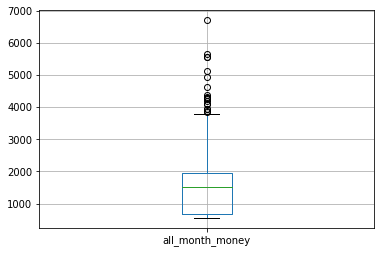

In [88]:
megaline_others.boxplot(column='all_month_money') 
plt.show()

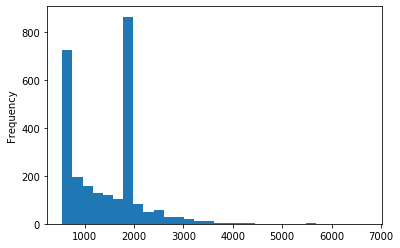

In [89]:
megaline_others['all_month_money'].plot(kind='hist', bins=30)
plt.show()

По графицу видно, что тоже есть редкие выбросы после 1950. Посмотрим, что без них

In [90]:
megaline_others['all_month_money'].quantile(0.75)

1950.0

Составляем выброку с крайними занчениями  550 и 1950 

In [91]:
megaline_others_1 = (
    megaline_all
    .query('city != "Москва"')
    .query('550 <= all_month_money <= 1950')
)
megaline_others_1['all_month_money'].agg(['mean','median','var','std'])

mean        1280.992920
median      1258.203125
var       346493.368078
std          588.636873
Name: all_month_money, dtype: float64

Среднее, дисперсия и стандартное отклоения у нас изменились.

Дисперсия megaline_others_1['all_month_money'] = 372145, Дисперсия megaline_Msk_1['all_month_money'] = 409836 - разница не случайна. 

### Нужно выяснить, средняя выручка жителей города Москвы отличается от средней выручки всех остальных пользователей тарифа смарт и ультра, которые не проживают в городе Москва?

Выдвинем гипотезы:

    H₀ - средние выручки на обоих тарифах равны
    H₁ - средние выручки по двум тарифам различаются

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

In [92]:
alpha = .05

results = st.ttest_ind(
    megaline_Msk_1['all_month_money'],
    megaline_others_1['all_month_money'],   
    equal_var = True)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.005212777965690132
Отвергаем нулевую гипотезу


Обнаружены различия между выручкой пользователей, проживающих в Москве и выручкой пользователей, проживающих в регионах.

# Вывод по полученным результатам.

Люди на разных тарифах ведут себя по-разному, что наверно и хорошо. Так и должно работать сегментирование. Но и переплачивают, а это, особенно в Смарте, может приводить к разочарованию и оттоку.

- СМС-ки никому не нужны на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду

- Тарифы приносят разные деньги, значимые различия есть
